## Portofolio: Analisis Penjualan BigMart
#### Dataset: BigMart Sales Data
#### Tujuan: Memahami faktor-faktor yang mempengaruhi penjualan produk di BigMart

In [6]:
# Install dependencies

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## 2. Memuat dan Mengecek Data


In [7]:
# Load dataset
df = pd.read_csv('..\Data\BigMart.csv')

# Tampilkan informasi dasar
print("Informasi Dataset:")
print(df.info())

# Tampilkan sampel data
print("\nSampel Data:")
display(df.head())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Sampel Data:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



Statistik Deskriptif:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 3. Pembersihan Data


In [8]:
# Handling missing values
print("Missing Values Sebelum Pembersihan:")
print(df.isnull().sum())

# Imputasi nilai hilang
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')  # modus

print("\nMissing Values Setelah Pembersihan:")
print(df.isnull().sum())

# Menghapus duplikat
df.drop_duplicates(inplace=True)

Missing Values Sebelum Pembersihan:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Values Setelah Pembersihan:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## 4. Visualisasi Data
### a. Distribusi Jenis Produk

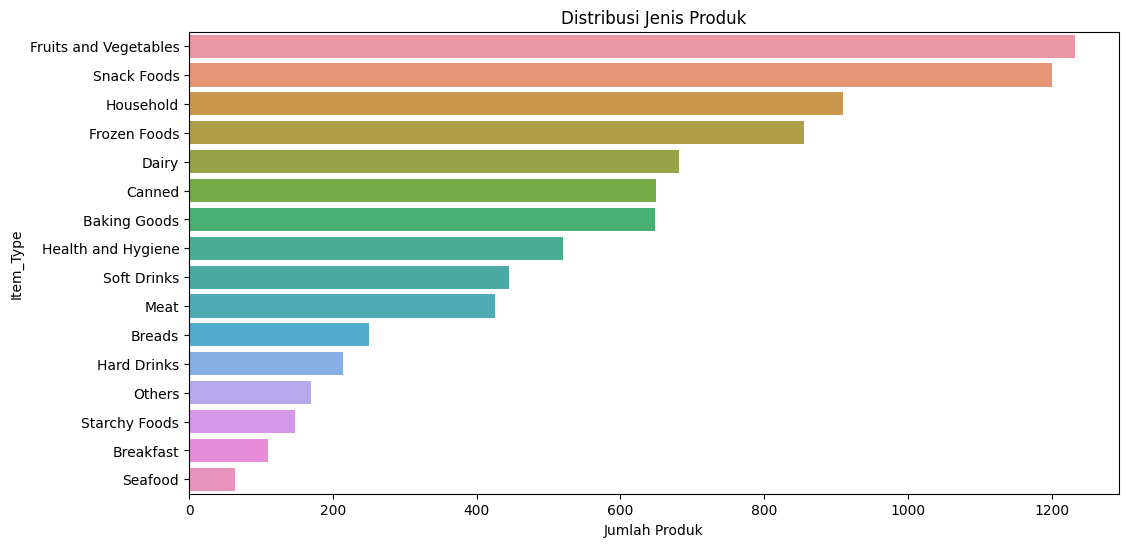

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Item_Type', data=df, order=df['Item_Type'].value_counts().index)
plt.title('Distribusi Jenis Produk')
plt.xlabel('Jumlah Produk')
plt.show()

### b. Penjualan Berdasarkan Outlet

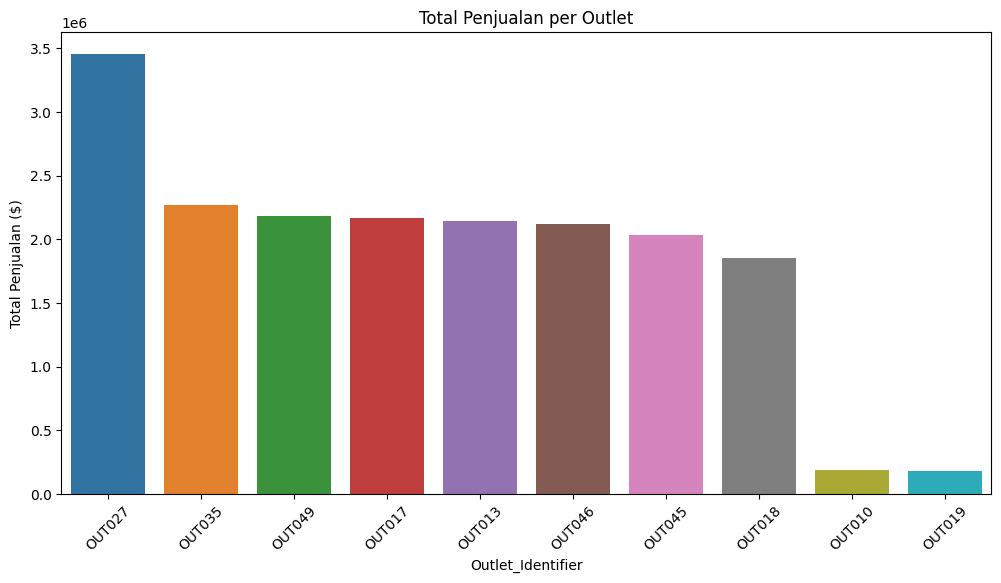

In [10]:
sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_outlet.index, y=sales_by_outlet.values)
plt.title('Total Penjualan per Outlet')
plt.xticks(rotation=45)
plt.ylabel('Total Penjualan ($)')
plt.show()

### c. Korelasi Variabel Numerik


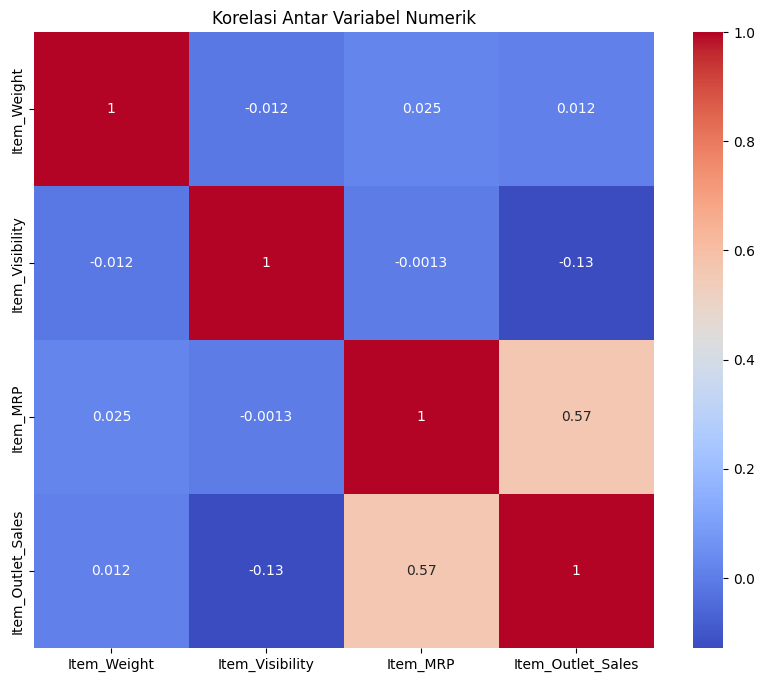

In [11]:
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

### d. Distribusi Harga Produk (MRP)


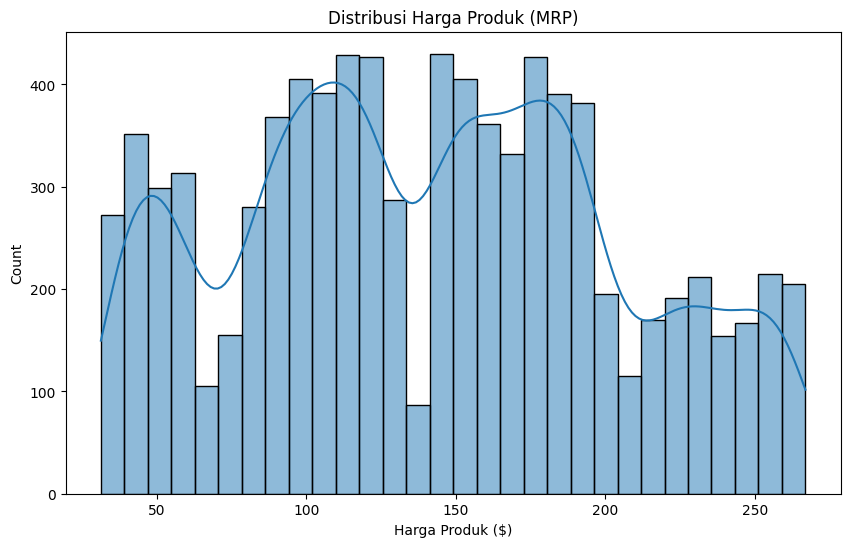

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_MRP'], kde=True, bins=30)
plt.title('Distribusi Harga Produk (MRP)')
plt.xlabel('Harga Produk ($)')
plt.show()

## 5. Insight Bisnis

In [13]:
# Produk dengan penjualan tertinggi
top_products = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().nlargest(10)
print("Produk dengan Penjualan Tertinggi:")
print(top_products)

# Outlet dengan performa terbaik
best_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().idxmax()
print(f"\nOutlet dengan Performa Terbaik: {best_outlet}")

# Rekomendasi strategis
print("\nRekomendasi Strategis:")
print("- Fokus pada promosi produk dengan MRP tinggi (> $200)")
print("- Tingkatkan stok di outlet OUT049 dan OUT035")
print("- Perluas kategori Frozen Foods dan Dairy karena permintaan tinggi")

Produk dengan Penjualan Tertinggi:
Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
FDK03    34843.9772
NCQ06    34680.1904
NCQ53    34508.4140
FDJ55    33531.0196
FDD44    32723.4042
Name: Item_Outlet_Sales, dtype: float64

Outlet dengan Performa Terbaik: OUT027

Rekomendasi Strategis:
- Fokus pada promosi produk dengan MRP tinggi (> $200)
- Tingkatkan stok di outlet OUT049 dan OUT035
- Perluas kategori Frozen Foods dan Dairy karena permintaan tinggi
